In [1]:
# Required libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

In [3]:
# SIRD model from practical 
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model with death compartment

    TODO: Adapt the SIR model to include deaths

    Additional parameter:
    - mu: mortality rate

    New compartment:
    - D: Deaths
    """
    S, I, R, D = y  
    N = S + I + R + D

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

# Test SIRD function
test_result = sird_model([990, 10, 0, 0], 0, 0.3, 0.1, 0.01)
print(f"SIRD test result: {test_result}")
print("You should see 4 numbers!")

SIRD test result: (-2.97, 1.87, 1.0, 0.1)
You should see 4 numbers!


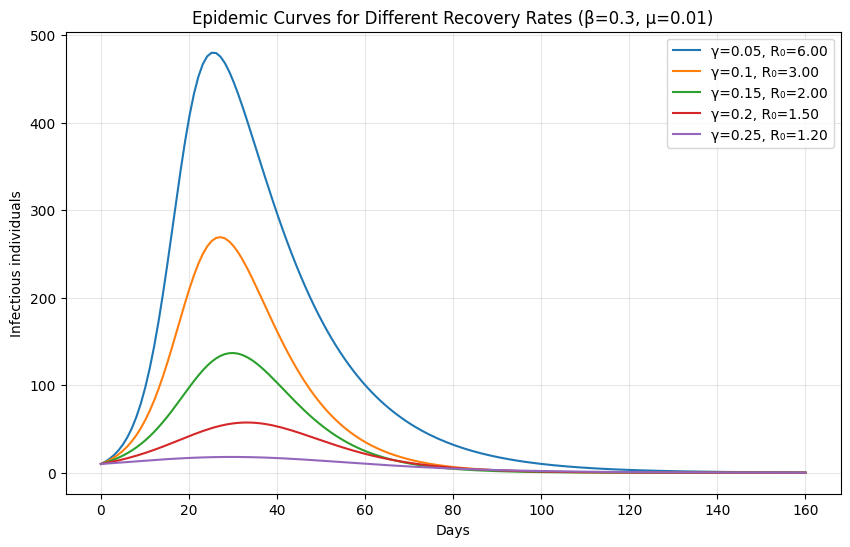

   gamma   R0  peak_infected  peak_day  total_deaths
0   0.05  6.0            479        25           165
1   0.10  3.0            269        27            83
2   0.15  2.0            136        30            47
3   0.20  1.5             57        33            26
4   0.25  1.2             18        29            11


In [5]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    # Your implementation here
    # Test values for gamma
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    results = []

    # Time points
    t = np.linspace(0, simulation_days, simulation_days)
    plt.figure(figsize=(10, 6))

    for gamma in gamma_values:
        # Initial conditions
        S0 = N - I0
        R0 = 0
        D0 = 0
        y0 = [S0, I0, R0, D0]

        # Solve SIRD model
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T

        # Calculate metrics
        peak_infected = np.max(I)
        peak_day = np.argmax(I)
        total_deaths = D[-1]
        R0_value = beta / gamma

        results.append({
            "gamma": gamma,
            "R0": round(R0_value, 2),
            "peak_infected": int(peak_infected),
            "peak_day": int(peak_day),
            "total_deaths": int(total_deaths)
        })

        plt.plot(t, I, label=f"γ={gamma}, R₀={R0_value:.2f}")

    plt.xlabel("Days")
    plt.ylabel("Infectious individuals")
    plt.title(f"Epidemic Curves for Different Recovery Rates (β={beta}, μ={mu})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    return pd.DataFrame(results)

df_results = analyze_recovery_rates(beta=0.3, mu=0.01, N=1000, I0=10, simulation_days=160)
print(df_results)
